<a href="https://colab.research.google.com/github/Farjana-Yesmin/FarjanaYesmin/blob/main/Open_Image_V7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openimages


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install tensorflow-datasets


In [ ]:
import openimages.download as oid

# Define the output directory in your Google Drive
output_dir = '/content/drive/MyDrive/open_images_bias_analysis'

# Increase the number of images to 5000 per class to capture more diversity
oid.download_dataset(output_dir, ['Person', 'Cat', 'Dog', 'Table', 'Chair'], limit=5000)


100%|██████████| 4020/4020 [30:24<00:00,  2.20it/s]


{'person': {'images_dir': '/content/drive/MyDrive/open_images_bias_analysis/person/images'},
 'cat': {'images_dir': '/content/drive/MyDrive/open_images_bias_analysis/cat/images'},
 'dog': {'images_dir': '/content/drive/MyDrive/open_images_bias_analysis/dog/images'},
 'table': {'images_dir': '/content/drive/MyDrive/open_images_bias_analysis/table/images'},
 'chair': {'images_dir': '/content/drive/MyDrive/open_images_bias_analysis/chair/images'}}

In [ ]:
!ls /content/drive/MyDrive/open_images_bias_analysis/person/images
!ls /content/drive/MyDrive/open_images_bias_analysis/cat/images
!ls /content/drive/MyDrive/open_images_bias_analysis/dog/images
!ls /content/drive/MyDrive/open_images_bias_analysis/table/images
!ls /content/drive/MyDrive/open_images_bias_analysis/chair/images


Streaming output truncated to the last 5000 lines.
0000f53faa4d14c3.jpg  0272bdc9313ddf6a.jpg  05db30223bf072db.jpg  0927aa1d1d637628.jpg
0000fcb8ed0ea243.jpg  02737d260316ec35.jpg  05db7f1ad6889bd7.jpg  092823d7ebc0f749.jpg
000101475b6bc944.jpg  02753670795c50e7.jpg  05de4206f949f891.jpg  092875e289354588.jpg
00010d873e81c61e.jpg  0277c0994a968671.jpg  05df6e132dac7205.jpg  092a5d67c955237a.jpg
00010f041a2a6fa5.jpg  0277e7d17d782512.jpg  05dfef1a51503284.jpg  092aa636aee99611.jpg
0001143bfa4f6ae7.jpg  027812656f44cfd7.jpg  05e0d7f775cf000b.jpg  092aaf568d7d64c8.jpg
00011aec5d7324f4.jpg  027839de88e3469e.jpg  05e1219639968e51.jpg  092b9298c6dce6c9.jpg
000132a014faadaf.jpg  02798d27f58fa691.jpg  05e140a0f7efdf13.jpg  092bb4a7a3304058.jpg
000134de87dd044b.jpg  027b40b647c2194a.jpg  05e3840b223dc087.jpg  092cf5058fc3141c.jpg
000140f27cb00816.jpg  027b6f6b5a8ed67d.jpg  05e3a917adbf67a3.jpg  092d7fa750698ece.jpg
000156c75d1ef7b2.jpg  027b807f0ec59beb.jpg  05e3def689a8a324.jpg  092da1160a0b4

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image directories
data_dir = '/content/drive/MyDrive/open_images_bias_analysis'
target_size = (224, 224)  # Image size for the model

# Create an ImageDataGenerator for loading and augmenting data
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the images
    validation_split=0.2  # Split 80% train, 20% validation
)

# Load training and validation data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 16059 images belonging to 5 classes.
Found 4013 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the classes you want to extract
classes_of_interest = ['Person', 'Cat', 'Dog', 'Table', 'Chair']

# Create ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

# Load images (assuming you're using directories with subdirectories for each class)
train_generator = train_datagen.flow_from_directory(
    'path_to_train_directory',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=classes_of_interest
)

val_generator = val_datagen.flow_from_directory(
    'path_to_validation_directory',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=classes_of_interest
)


Found 0 images belonging to 5 classes.
Found 0 images belonging to 5 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_directory = '/content/drive/MyDrive/datasets/train'
val_directory = '/content/drive/MyDrive/datasets/validation'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_path = '/content/drive/MyDrive/datasets'


In [ ]:
import os

# List the contents of your Google Drive root
base_path = '/content/drive/MyDrive/'
print("Google Drive Contents:", os.listdir(base_path))


Google Drive Contents: ['Getting started.pdf', 'file5.txt', 'Ensemble Models for Data-driven Prediction of Malware Infections.gslides', 'Project.gdoc', 'Project.gslides', 'Untitled document.gdoc', 'ACM SIGHPC   Intel - Graduate Fellowship for Women and Minorities in Computational & Data Science.gslides', 'Untitled presentation.gslides', 'Kid Steam- Today', 'IMG_4754.MOV', 'IMG_4791.MOV', 'IMG_4752.MOV', 'IMG_4767.MOV', 'IMG_4759.MOV', 'IMG_4748.MOV', 'IMG_4764.MOV', 'IMG_4799.MOV', 'IMG_4793.MOV', 'IMG_4766.MOV', 'IMG_4758.MOV', 'IMG_4792.MOV', 'IMG_4796.MOV', 'IMG_4757.MOV', 'IMG_4765.MOV', 'IMG_4781.HEIC', 'IMG_4795.HEIC', 'IMG_4788.HEIC', 'IMG_4783.HEIC', 'IMG_4782.HEIC', 'IMG_4750.HEIC', 'IMG_4776.HEIC', 'IMG_4778.HEIC', 'IMG_4779.HEIC', 'IMG_4780.HEIC', 'IMG_4775.HEIC', 'IMG_4777.HEIC', 'IMG_4733.HEIC', 'IMG_4756.HEIC', 'IMG_4769.HEIC', 'IMG_4763.HEIC', 'IMG_4734.HEIC', 'IMG_4772.HEIC', 'IMG_4735.HEIC', 'IMG_4771.HEIC', 'IMG_4746.HEIC', 'IMG_4773.HEIC', 'IMG_4732.HEIC', 'IMG_4774.

In [ ]:
import os

# List the main directory contents of Colab (this will show all available folders/files in Colab)
base_directory = '/content/'
print("Colab Root Directory Contents:", os.listdir(base_directory))


Colab Root Directory Contents: ['.config', 'drive', 'sample_data']


In [ ]:
import os

# List the contents of your Google Drive
drive_directory = '/content/drive/MyDrive/'
print("Google Drive Contents:", os.listdir(drive_directory))


Google Drive Contents: ['Getting started.pdf', 'file5.txt', 'Ensemble Models for Data-driven Prediction of Malware Infections.gslides', 'Project.gdoc', 'Project.gslides', 'Untitled document.gdoc', 'ACM SIGHPC   Intel - Graduate Fellowship for Women and Minorities in Computational & Data Science.gslides', 'Untitled presentation.gslides', 'Kid Steam- Today', 'IMG_4754.MOV', 'IMG_4791.MOV', 'IMG_4752.MOV', 'IMG_4767.MOV', 'IMG_4759.MOV', 'IMG_4748.MOV', 'IMG_4764.MOV', 'IMG_4799.MOV', 'IMG_4793.MOV', 'IMG_4766.MOV', 'IMG_4758.MOV', 'IMG_4792.MOV', 'IMG_4796.MOV', 'IMG_4757.MOV', 'IMG_4765.MOV', 'IMG_4781.HEIC', 'IMG_4795.HEIC', 'IMG_4788.HEIC', 'IMG_4783.HEIC', 'IMG_4782.HEIC', 'IMG_4750.HEIC', 'IMG_4776.HEIC', 'IMG_4778.HEIC', 'IMG_4779.HEIC', 'IMG_4780.HEIC', 'IMG_4775.HEIC', 'IMG_4777.HEIC', 'IMG_4733.HEIC', 'IMG_4756.HEIC', 'IMG_4769.HEIC', 'IMG_4763.HEIC', 'IMG_4734.HEIC', 'IMG_4772.HEIC', 'IMG_4735.HEIC', 'IMG_4771.HEIC', 'IMG_4746.HEIC', 'IMG_4773.HEIC', 'IMG_4732.HEIC', 'IMG_4774.

In [ ]:
import os

# Path to the potential dataset folder in Google Drive
dataset_directory = '/content/drive/MyDrive/open_images_bias_analysis/'

# List the contents of the directory
print("Dataset Directory Contents:", os.listdir(dataset_directory))


Dataset Directory Contents: ['person', 'cat', 'dog', 'table', 'chair']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the dataset
dataset_directory = '/content/drive/MyDrive/open_images_bias_analysis/'

# Create an ImageDataGenerator for preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1]
    validation_split=0.2  # Split 20% of the data for validation
)

# Load the training data
train_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(224, 224),  # Resize images to 224x224 (adjust as needed)
    batch_size=32,
    class_mode='categorical',  # Assuming multi-class classification
    subset='training'  # Use the training subset
)

# Load the validation data
validation_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use the validation subset
)


Found 16059 images belonging to 5 classes.
Found 4013 images belonging to 5 classes.


In [ ]:
import os

# List contents of Google Drive to find the correct path to your dataset
drive_directory = '/content/drive/MyDrive/open_images_bias_analysis/'
print("Google Drive Contents:", os.listdir(drive_directory))


Google Drive Contents: ['person', 'cat', 'dog', 'table', 'chair']


In [ ]:
train_directory = '/content/drive/MyDrive/open_images_bias_analysis/train'
val_directory = '/content/drive/MyDrive/open_images_bias_analysis/val'


In [ ]:
import os

# Check the contents of the 'open_images_bias_analysis' directory
dataset_directory = '/content/drive/MyDrive/open_images_bias_analysis/'
print("Dataset Directory Contents:", os.listdir(dataset_directory))


Dataset Directory Contents: ['person', 'cat', 'dog', 'table', 'chair']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your dataset
dataset_directory = '/content/drive/MyDrive/open_images_bias_analysis/'

# Set up the ImageDataGenerator for training data
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]

# Load the images directly from the directory
train_generator = train_datagen.flow_from_directory(
    dataset_directory,  # Main directory
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

# Check if the generator is working
print("Number of classes found:", len(train_generator.class_indices))


Found 20072 images belonging to 5 classes.
Number of classes found: 5


In [ ]:
# Evaluate the model on the validation set (used as a test set)
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Loss (Test): {val_loss}")
print(f"Validation Accuracy (Test): {val_accuracy}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.8071 - loss: 0.4752
Validation Loss (Test): 0.47732430696487427
Validation Accuracy (Test): 0.8047500252723694


In [ ]:
# Save the model
model_save_path = '/content/drive/MyDrive/open_images_bias_analysis/saved_model/mobilenet_v2_model.h5'
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")


Model saved to: /content/drive/MyDrive/open_images_bias_analysis/saved_model/mobilenet_v2_model.h5


In [ ]:
# Save the model in the newer .keras format
model_save_path_keras = '/content/drive/MyDrive/open_images_bias_analysis/saved_model/mobilenet_v2_model.keras'
model.save(model_save_path_keras)
print(f"Model saved to: {model_save_path_keras}")


Model saved to: /content/drive/MyDrive/open_images_bias_analysis/saved_model/mobilenet_v2_model.keras


In [ ]:
model.save('/content/drive/MyDrive/open_images_bias_analysis/saved_model/mobilenet_v2_model.keras')



In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

# Rebuild the model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(5, activation='softmax')(x)  # 5 classes

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Save the model
model.save('/content/drive/MyDrive/open_images_bias_analysis/saved_model/mobilenet_v2_model.keras')


In [ ]:
# Load the model
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/open_images_bias_analysis/saved_model/mobilenet_v2_model.keras')

# Check the model summary
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 10,656,337 (40.65 MB)

 Trainable params: 3,540,741 (13.51 MB)

 Non-trainable params: 34,112 (133.25 KB)

 Optimizer params: 7,081,484 (27.01 MB)

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,  # Or the number of epochs you prefer
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size
)


In [ ]:
'/content/drive/MyDrive/path_to_your_folder/open_images_bias_analysis'

'/content/drive/MyDrive/path_to_your_folder/open_images_bias_analysis'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
print(os.listdir('/content/drive/MyDrive'))


['Getting started.pdf', 'file5.txt', 'Ensemble Models for Data-driven Prediction of Malware Infections.gslides', 'Project.gdoc', 'Project.gslides', 'Untitled document.gdoc', 'ACM SIGHPC   Intel - Graduate Fellowship for Women and Minorities in Computational & Data Science.gslides', 'Untitled presentation.gslides', 'Kid Steam- Today', 'IMG_4754.MOV', 'IMG_4791.MOV', 'IMG_4752.MOV', 'IMG_4767.MOV', 'IMG_4759.MOV', 'IMG_4748.MOV', 'IMG_4764.MOV', 'IMG_4799.MOV', 'IMG_4793.MOV', 'IMG_4766.MOV', 'IMG_4758.MOV', 'IMG_4792.MOV', 'IMG_4796.MOV', 'IMG_4757.MOV', 'IMG_4765.MOV', 'IMG_4781.HEIC', 'IMG_4795.HEIC', 'IMG_4788.HEIC', 'IMG_4783.HEIC', 'IMG_4782.HEIC', 'IMG_4750.HEIC', 'IMG_4776.HEIC', 'IMG_4778.HEIC', 'IMG_4779.HEIC', 'IMG_4780.HEIC', 'IMG_4775.HEIC', 'IMG_4777.HEIC', 'IMG_4733.HEIC', 'IMG_4756.HEIC', 'IMG_4769.HEIC', 'IMG_4763.HEIC', 'IMG_4734.HEIC', 'IMG_4772.HEIC', 'IMG_4735.HEIC', 'IMG_4771.HEIC', 'IMG_4746.HEIC', 'IMG_4773.HEIC', 'IMG_4732.HEIC', 'IMG_4774.HEIC', 'VID_20190223_18

In [ ]:
print(os.listdir('/content/drive/MyDrive/open_images_bias_analysis'))


['person', 'cat', 'dog', 'table', 'chair', 'saved_model']


In [ ]:
print(os.listdir('/content/drive/MyDrive/open_images_bias_analysis/saved_model'))


['mobilenet_v2_model.h5', 'mobilenet_v2_model.keras']


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/open_images_bias_analysis/saved_model/mobilenet_v2_model.keras')

# Check the model summary to ensure it's loaded correctly
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 322 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 10,656,337 (40.65 MB)

 Trainable params: 3,540,741 (13.51 MB)

 Non-trainable params: 34,112 (133.25 KB)

 Optimizer params: 7,081,484 (27.01 MB)

In [ ]:
import os

# Check the actual path that exists in your Google Drive
print(os.listdir('/content/drive/MyDrive/open_images_bias_analysis'))


['person', 'cat', 'dog', 'table', 'chair', 'saved_model']


In [ ]:
import os
import shutil
import random

# Define the path to your dataset
data_path = '/content/drive/MyDrive/open_images_bias_analysis'

# Define the path for your test data folder
test_data_path = '/content/drive/MyDrive/open_images_bias_analysis/test_data'
os.makedirs(test_data_path, exist_ok=True)

# Define the list of classes
classes = ['person', 'cat', 'dog', 'table', 'chair']

# Create subdirectories for each class in the test_data directory
for class_name in classes:
    os.makedirs(os.path.join(test_data_path, class_name), exist_ok=True)

# Split data: Move 20% of images from each class folder to the test data
for class_name in classes:
    class_dir = os.path.join(data_path, class_name)
    image_files = os.listdir(class_dir)
    test_images = random.sample(image_files, k=int(0.2 * len(image_files)))  # 20% for testing

    # Move selected images to the test data folder
    for image in test_images:
        shutil.move(os.path.join(class_dir, image), os.path.join(test_data_path, class_name, image))

print("Test data prepared successfully!")


Test data prepared successfully!


In [ ]:
import os

# Check if test images are in place
test_data_path = '/content/drive/MyDrive/open_images_bias_analysis/test_data'
for class_name in ['person', 'cat', 'dog', 'table', 'chair']:
    class_dir = os.path.join(test_data_path, class_name)
    print(f"Found {len(os.listdir(class_dir))} images in {class_dir}")


Found 0 images in /content/drive/MyDrive/open_images_bias_analysis/test_data/person
Found 0 images in /content/drive/MyDrive/open_images_bias_analysis/test_data/cat
Found 0 images in /content/drive/MyDrive/open_images_bias_analysis/test_data/dog
Found 0 images in /content/drive/MyDrive/open_images_bias_analysis/test_data/table
Found 0 images in /content/drive/MyDrive/open_images_bias_analysis/test_data/chair


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the source path where your images are stored
source_path = '/content/drive/MyDrive/open_images_bias_analysis'

# Define the target directories for train and test datasets
train_data_path = '/content/drive/MyDrive/open_images_bias_analysis/train_data'
test_data_path = '/content/drive/MyDrive/open_images_bias_analysis/test_data'

# Make sure the directories exist
os.makedirs(train_data_path, exist_ok=True)
os.makedirs(test_data_path, exist_ok=True)

# List of class names
classes = ['person', 'cat', 'dog', 'table', 'chair']

# Split the images into training and testing sets
for class_name in classes:
    class_dir = os.path.join(source_path, class_name)

    # Get all image paths in the class folder
    image_paths = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith(('.jpg', '.png', '.jpeg'))]

    # Skip classes with fewer than 2 images (cannot split)
    if len(image_paths) < 2:
        print(f"Skipping class '{class_name}' because it has less than 2 images.")
        continue

    # Split the images into training and testing
    train_paths, test_paths = train_test_split(image_paths, test_size=0.2, random_state=42)  # 80% train, 20% test

    # Create subdirectories for each class in the train and test directories
    train_class_dir = os.path.join(train_data_path, class_name)
    test_class_dir = os.path.join(test_data_path, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Move the training images to the train directory
    for img_path in train_paths:
        shutil.copy(img_path, train_class_dir)

    # Move the testing images to the test directory
    for img_path in test_paths:
        shutil.copy(img_path, test_class_dir)

    print(f"Moved {len(train_paths)} images to {train_class_dir}")
    print(f"Moved {len(test_paths)} images to {test_class_dir}")


Skipping class 'person' because it has less than 2 images.
Skipping class 'cat' because it has less than 2 images.
Skipping class 'dog' because it has less than 2 images.
Skipping class 'table' because it has less than 2 images.
Skipping class 'chair' because it has less than 2 images.


In [ ]:
import os
import shutil

# Define the source path where your images are stored
source_path = '/content/drive/MyDrive/open_images_bias_analysis'

# Define the target directories for train and test datasets
train_data_path = '/content/drive/MyDrive/open_images_bias_analysis/train_data'
test_data_path = '/content/drive/MyDrive/open_images_bias_analysis/test_data'

# Make sure the directories exist
os.makedirs(train_data_path, exist_ok=True)
os.makedirs(test_data_path, exist_ok=True)

# List of class names
classes = ['person', 'cat', 'dog', 'table', 'chair']

# Move all images to the training dataset (without splitting)
for class_name in classes:
    class_dir = os.path.join(source_path, class_name)

    # Get all image paths in the class folder
    image_paths = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith(('.jpg', '.png', '.jpeg'))]

    # Skip classes with no images
    if len(image_paths) < 1:
        print(f"Skipping class '{class_name}' because it has no images.")
        continue

    # Create subdirectories for each class in the train directory
    train_class_dir = os.path.join(train_data_path, class_name)
    os.makedirs(train_class_dir, exist_ok=True)

    # Move all images to the train directory
    for img_path in image_paths:
        shutil.copy(img_path, train_class_dir)

    print(f"Moved {len(image_paths)} images to {train_class_dir}")


Skipping class 'person' because it has no images.
Skipping class 'cat' because it has no images.
Skipping class 'dog' because it has no images.
Skipping class 'table' because it has no images.
Skipping class 'chair' because it has no images.


In [ ]:
for class_name in classes:
    class_dir = os.path.join(source_path, class_name)
    print(f"Checking images in {class_name}:")
    for img in os.listdir(class_dir):
        print(img)


Checking images in person:
images
Checking images in cat:
images
Checking images in dog:
images
Checking images in table:
images
Checking images in chair:
images


In [ ]:
for class_name in classes:
    class_dir = os.path.join(source_path, class_name, 'images')  # Go deeper into the "images" folder
    print(f"Checking images in {class_name}/images:")
    for img in os.listdir(class_dir):
        print(img)


Streaming output truncated to the last 5000 lines.
000d28725962d4a9.jpg
00118906f9e5bb41.jpg
000e082b0dce859e.jpg
00113a6dc6c71b5e.jpg
000efb7df8aa950c.jpg
00119232bc393ce2.jpg
0012412895432b2d.jpg
00121eb7671f8465.jpg
00134148c2ab3db5.jpg
001356fc5bf8e731.jpg
00138802843b53b2.jpg
00147ab54794c29c.jpg
0018de8db0acc865.jpg
0018aab9ac7fa8eb.jpg
0016e7571a7e76c9.jpg
0015084373d62a70.jpg
00185eed7ee580c2.jpg
00182e06281874be.jpg
00165e8dabc5a01c.jpg
00199480f2daba0a.jpg
001a855fd511a583.jpg
00198353ef684011.jpg
001a4a9fc0d7dce3.jpg
001afaed290e67a2.jpg
001a064f84f98c59.jpg
001bdfc9d80eead2.jpg
001b30ed0186b87e.jpg
001ae5e9e1c9ab0d.jpg
001cdcf57aea6419.jpg
001cbac16170c860.jpg
001db64c9594f669.jpg
001e5ad725a4c7c3.jpg
001d46cb341d0287.jpg
001e0432cb8c105a.jpg
001e341dd7456c72.jpg
001e72f01d1033a9.jpg
001fc22eb4b72fdc.jpg
0021978380eedc8e.jpg
001e813d54a0acca.jpg
002226d0d2cb87c8.jpg
0023d59d6c42b031.jpg
0025fa54add94b15.jpg
0024bf494d632834.jpg
0025d98dac2dd786.jpg
00245bd2a8e8df85.jpg
0027

In [ ]:
for class_name in classes:
    class_dir = os.path.join(source_path, class_name, 'images')  # Adjust to point inside the 'images' folder
    image_paths = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith(('.jpg', '.png', '.jpeg'))]
    print(f"Class '{class_name}' has {len(image_paths)} image(s).")


Class 'person' has 5000 image(s).
Class 'cat' has 3503 image(s).
Class 'dog' has 2549 image(s).
Class 'table' has 5000 image(s).
Class 'chair' has 4020 image(s).


In [ ]:
import shutil
from sklearn.model_selection import train_test_split

# Directory paths
source_path = '/content/drive/MyDrive/open_images_bias_analysis/'
train_path = '/content/drive/MyDrive/open_images_bias_analysis/train_data/'
test_path = '/content/drive/MyDrive/open_images_bias_analysis/test_data/'

# Define class names
classes = ['person', 'cat', 'dog', 'table', 'chair']

# Create directories for train and test datasets
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Loop through each class and split the data
for class_name in classes:
    class_dir = os.path.join(source_path, class_name, 'images')  # Adjust path
    image_paths = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith(('.jpg', '.png', '.jpeg'))]

    # Split the dataset into training and testing (80% train, 20% test)
    train_paths, test_paths = train_test_split(image_paths, test_size=0.2, random_state=42)

    # Create subdirectories for each class in the train and test directories
    os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_path, class_name), exist_ok=True)

    # Move images to train and test directories
    for path in train_paths:
        shutil.copy(path, os.path.join(train_path, class_name))

    for path in test_paths:
        shutil.copy(path, os.path.join(test_path, class_name))

    print(f"Class '{class_name}' split: {len(train_paths)} train, {len(test_paths)} test images.")


Class 'person' split: 4000 train, 1000 test images.
Class 'cat' split: 2802 train, 701 test images.
Class 'dog' split: 2039 train, 510 test images.
Class 'table' split: 4000 train, 1000 test images.
Class 'chair' split: 3216 train, 804 test images.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define the training and testing generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),  # Match model input size
    batch_size=32,
    class_mode='categorical',  # Assuming multi-class classification
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 16057 images belonging to 5 classes.
Found 4015 images belonging to 5 classes.


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust number of epochs as needed
    validation_data=test_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


502/502 ━━━━━━━━━━━━━━━━━━━━ 430s 723ms/step - accuracy: 0.6140 - loss: 1.0028 - val_accuracy: 0.4010 - val_loss: 2.3646
Epoch 2/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 319s 629ms/step - accuracy: 0.7181 - loss: 0.7289 - val_accuracy: 0.3258 - val_loss: 3.3518
Epoch 3/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 321s 625ms/step - accuracy: 0.7508 - loss: 0.6445 - val_accuracy: 0.3589 - val_loss: 3.3048
Epoch 4/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 316s 624ms/step - accuracy: 0.7808 - loss: 0.5821 - val_accuracy: 0.2364 - val_loss: 5.1642
Epoch 5/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 325s 629ms/step - accuracy: 0.7875 - loss: 0.5531 - val_accuracy: 0.3305 - val_loss: 4.0984
Epoch 6/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 320s 623ms/step - accuracy: 0.8088 - loss: 0.5004 - val_accuracy: 0.2792 - val_loss: 5.1098
Epoch 7/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 316s 623ms/step - accuracy: 0.8273 - loss: 0.4609 - val_accuracy: 0.4154 - val_loss: 2.9236
Epoch 8/10
502/502 ━━━━━━━━━━━━━━━━━━━━ 320s 619ms/step - accuracy: 0.8389 - loss: 0.43

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


126/126 ━━━━━━━━━━━━━━━━━━━━ 48s 379ms/step - accuracy: 0.4928 - loss: 2.3361
Test Loss: 2.859454870223999
Test Accuracy: 0.41220423579216003


In [ ]:
# Save the trained model in the recommended Keras format
model.save('/content/drive/MyDrive/open_images_bias_analysis/saved_model/mobilenet_v2_model_trained.keras')


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


126/126 ━━━━━━━━━━━━━━━━━━━━ 48s 379ms/step - accuracy: 0.4928 - loss: 2.3361
Test Loss: 2.859454870223999
Test Accuracy: 0.41220423579216003


126/126 ━━━━━━━━━━━━━━━━━━━━ 54s 392ms/step
              precision    recall  f1-score   support

         cat       0.56      0.51      0.53       701
       chair       0.64      0.40      0.49       804
         dog       0.23      0.92      0.37       510
      person       0.59      0.35      0.44      1000
       table       0.67      0.15      0.25      1000

    accuracy                           0.41      4015
   macro avg       0.54      0.47      0.42      4015
weighted avg       0.57      0.41      0.41      4015



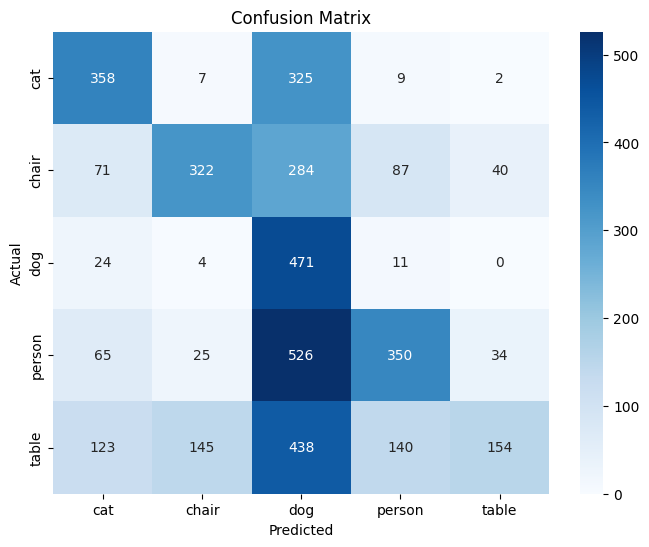

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true and predicted labels
true_labels = test_generator.classes
predictions = model.predict(test_generator, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)

# Classification report
report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Define the path to your existing training data
train_data_path = '/content/drive/MyDrive/open_images_bias_analysis/train_data'

# List all the class directories
class_names = ['person', 'cat', 'dog', 'table', 'chair']

# Create a validation directory
validation_data_path = '/content/drive/MyDrive/open_images_bias_analysis/validation_data'
if not os.path.exists(validation_data_path):
    os.makedirs(validation_data_path)

# Split the data into training and validation sets
for class_name in class_names:
    class_path = os.path.join(train_data_path, class_name)
    # Get all the image paths for the current class
    all_images = os.listdir(class_path)

    # Split the images into training and validation sets (80% train, 20% validation)
    train_images, val_images = train_test_split(all_images, test_size=0.2, random_state=42)

    # Create the class directories in the validation set
    class_validation_path = os.path.join(validation_data_path, class_name)
    if not os.path.exists(class_validation_path):
        os.makedirs(class_validation_path)

    # Move the validation images to the validation directory
    for val_image in val_images:
        shutil.move(os.path.join(class_path, val_image), os.path.join(class_validation_path, val_image))

print("Validation set created successfully!")



Validation set created successfully!


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    validation_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 3213 images belonging to 5 classes.


In [ ]:
import os

# Specify the path to the missing file
image_path = '/content/drive/MyDrive/open_images_bias_analysis/train_data/chair/54d37623a7d21d80.jpg'

# Check if the file exists
if not os.path.exists(image_path):
    print(f"File not found: {image_path}")
else:
    print(f"File exists: {image_path}")


File not found: /content/drive/MyDrive/open_images_bias_analysis/train_data/chair/54d37623a7d21d80.jpg


In [ ]:
import shutil

# Path to the class folder (chair) that has the missing file
chair_class_path = '/content/drive/MyDrive/open_images_bias_analysis/train_data/chair'

# Remove the entire 'chair' class folder or any incomplete folders
if os.path.exists(chair_class_path):
    shutil.rmtree(chair_class_path)
    print(f"Removed missing class directory: {chair_class_path}")
else:
    print(f"Directory does not exist: {chair_class_path}")


Removed missing class directory: /content/drive/MyDrive/open_images_bias_analysis/train_data/chair


In [ ]:
# Path to the training dataset directory
train_data_path = '/content/drive/MyDrive/open_images_bias_analysis/train_data'

# List all classes
classes = os.listdir(train_data_path)

# Check for any missing images in the classes
for class_name in classes:
    class_path = os.path.join(train_data_path, class_name)
    if not os.path.exists(class_path):
        print(f"Missing directory: {class_path}")
    else:
        class_images = os.listdir(class_path)
        if len(class_images) == 0:
            print(f"No images found in class: {class_name}")


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

# Get the model's output layer before the last one
x = model.layers[-2].output

# Add a new Dense layer with 4 output units (matching your dataset's classes)
output = Dense(4, activation='softmax')(x)

# Create the new model with the updated output layer
model = Model(inputs=model.input, outputs=output)

# Recompile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(
    train_generator_with_weights,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size
)


Epoch 1/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 205s 474ms/step - accuracy: 0.8429 - loss: 0.6303
Epoch 2/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 145s 451ms/step - accuracy: 0.9142 - loss: 0.3510
Epoch 3/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 138s 430ms/step - accuracy: 0.9014 - loss: 0.3756
Epoch 4/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 131s 410ms/step - accuracy: 0.9251 - loss: 0.2849
Epoch 5/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 131s 408ms/step - accuracy: 0.9355 - loss: 0.2512
Epoch 6/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 129s 401ms/step - accuracy: 0.9395 - loss: 0.2457
Epoch 7/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 129s 403ms/step - accuracy: 0.9372 - loss: 0.2343
Epoch 8/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 129s 401ms/step - accuracy: 0.9434 - loss: 0.2289
Epoch 9/10
 54/321 ━━━━━━━━━━━━━━━━━━━━ 1:43 386ms/step - accuracy: 0.9611 - loss: 0.1885

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
dataset_dir = '/content/drive/MyDrive/open_images_bias_analysis/'
print(os.listdir(dataset_dir))


['person', 'cat', 'dog', 'table', 'chair', 'saved_model', 'test_data', 'train_data', 'validation_data']


In [ ]:
saved_model_dir = '/content/drive/MyDrive/open_images_bias_analysis/saved_model/'
print(os.listdir(saved_model_dir))


['mobilenet_v2_model.h5', 'mobilenet_v2_model.keras', 'mobilenet_v2_model_trained.h5', 'mobilenet_v2_model_trained.keras']


In [ ]:
from tensorflow.keras.models import load_model
model_path = '/content/drive/MyDrive/open_images_bias_analysis/saved_model/mobilenet_v2_model_trained.h5'
model = load_model(model_path)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Re-compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',  # Assuming multi-class classification
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.optimizers import Adam

# Re-compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',  # Assuming multi-class classification
              metrics=['accuracy'])


In [ ]:
import tensorflow as tf


In [ ]:
train_generator.batch_size = 16  # Try reducing to 16 or 32 depending on available memory


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/open_images_bias_analysis/train_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 10272 images belonging to 4 classes.


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/open_images_bias_analysis/train_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 10272 images belonging to 4 classes.


In [ ]:
from tensorflow.keras import mixed_precision

# Set the mixed precision policy
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/open_images_bias_analysis/train_data',  # Corrected path
    target_size=(128, 128),  # Adjusted resolution
    batch_size=32,
    class_mode='categorical'
)


Found 10272 images belonging to 4 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/open_images_bias_analysis/validation_data',  # Corrected path
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 3213 images belonging to 5 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Training classes: ['person', 'cat', 'dog', 'table']
Validation classes: ['person', 'cat', 'dog', 'table', 'chair']


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Debugging line to inspect class information
print("Classes in training set:", np.unique(train_generator.classes))

# Compute class weights to handle class imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),  # Pass the unique classes
    y=train_generator.classes                    # Pass the class labels
)
class_weight_dict = dict(enumerate(class_weights))

# Confirm computed class weights
print("Class weights:", class_weight_dict)


Classes in training set: [0 1 2 3]
Class weights: {0: 1.1459170013386881, 1: 1.5744941753525445, 2: 0.8025, 3: 0.8025}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# List the files in the root of the Google Drive
drive_root = '/content/drive/MyDrive/'
print(os.listdir(drive_root))


['Getting started.pdf', 'file5.txt', 'Ensemble Models for Data-driven Prediction of Malware Infections.gslides', 'Project.gdoc', 'Project.gslides', 'Untitled document.gdoc', 'ACM SIGHPC   Intel - Graduate Fellowship for Women and Minorities in Computational & Data Science.gslides', 'Untitled presentation.gslides', 'Kid Steam- Today', 'IMG_4754.MOV', 'IMG_4791.MOV', 'IMG_4752.MOV', 'IMG_4767.MOV', 'IMG_4759.MOV', 'IMG_4748.MOV', 'IMG_4764.MOV', 'IMG_4799.MOV', 'IMG_4793.MOV', 'IMG_4766.MOV', 'IMG_4758.MOV', 'IMG_4792.MOV', 'IMG_4796.MOV', 'IMG_4757.MOV', 'IMG_4765.MOV', 'IMG_4781.HEIC', 'IMG_4795.HEIC', 'IMG_4788.HEIC', 'IMG_4783.HEIC', 'IMG_4782.HEIC', 'IMG_4750.HEIC', 'IMG_4776.HEIC', 'IMG_4778.HEIC', 'IMG_4779.HEIC', 'IMG_4780.HEIC', 'IMG_4775.HEIC', 'IMG_4777.HEIC', 'IMG_4733.HEIC', 'IMG_4756.HEIC', 'IMG_4769.HEIC', 'IMG_4763.HEIC', 'IMG_4734.HEIC', 'IMG_4772.HEIC', 'IMG_4735.HEIC', 'IMG_4771.HEIC', 'IMG_4746.HEIC', 'IMG_4773.HEIC', 'IMG_4732.HEIC', 'IMG_4774.HEIC', 'VID_20190223_18

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/open_images_bias_analysis/train_data',  # Updated path
    target_size=(128, 128),  # Smaller image size
    batch_size=16,
    class_mode='categorical'
)


Found 10272 images belonging to 4 classes.


In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)


In [ ]:
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout


In [ ]:
from keras.applications import MobileNetV2
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model

# Create the model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout layer
output = Dense(4, activation='softmax')(x)  # Output layer for 4 classes

model = Model(inputs=base_model.input, outputs=output)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
target_size=(64, 64)


In [ ]:
batch_size=4


In [ ]:
from keras.applications import EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from tensorflow.keras import mixed_precision

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)


In [ ]:
from tensorflow.keras import mixed_precision

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)


In [ ]:
for layer in base_model.layers:
    layer.trainable = False  # Freeze layers


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


In [ ]:
steps_per_epoch=50  # Reduce to a smaller number for testing
validation_steps=50  # Same for validation


In [ ]:
# Image generators with new target size (64, 64)
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Correct paths to train and validation data
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/open_images_bias_analysis/train_data',  # Corrected path
    target_size=(64, 64),  # Change this to (64, 64)
    batch_size=16,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/open_images_bias_analysis/validation_data',  # Corrected path
    target_size=(64, 64),  # Change this to (64, 64)
    batch_size=16,
    class_mode='categorical'
)


Found 10272 images belonging to 4 classes.
Found 3213 images belonging to 5 classes.


In [ ]:
train_data_path = '/content/drive/MyDrive/open_images_bias_analysis/train_data'
validation_data_path = '/content/drive/MyDrive/open_images_bias_analysis/validation_data'
test_data_path = '/content/drive/MyDrive/open_images_bias_analysis/test_data'


In [ ]:
import os

# Check the classes in both directories
print("Classes in Train Data:", os.listdir(train_data_path))
print("Classes in Validation Data:", os.listdir(validation_data_path))
print("Classes in Test Data:", os.listdir(test_data_path))


Classes in Train Data: ['person', 'cat', 'dog', 'table']
Classes in Validation Data: ['person', 'cat', 'dog', 'table', 'chair']
Classes in Test Data: ['person', 'cat', 'dog', 'table', 'chair']


In [ ]:
import os

# Define the path for the chair folder
chair_folder_path = '/content/drive/MyDrive/open_images_bias_analysis/train_data/chair/'

# Check if the directory exists, if not, create it
if not os.path.exists(chair_folder_path):
    os.makedirs(chair_folder_path)

print(f"Chair folder created at: {chair_folder_path}")


Chair folder created at: /content/drive/MyDrive/open_images_bias_analysis/train_data/chair/


In [ ]:
import shutil

# Define paths for validation and test images and the new train data path for 'chair'
validation_chair_path = '/content/drive/MyDrive/open_images_bias_analysis/validation_data/chair/'
test_chair_path = '/content/drive/MyDrive/open_images_bias_analysis/test_data/chair/'

# Move validation and test chair images to the train data chair folder
for chair_image in os.listdir(validation_chair_path):
    shutil.move(os.path.join(validation_chair_path, chair_image), chair_folder_path)

for chair_image in os.listdir(test_chair_path):
    shutil.move(os.path.join(test_chair_path, chair_image), chair_folder_path)

print("Chair images moved from validation and test data to train data.")


Chair images moved from validation and test data to train data.


In [ ]:
output = Dense(5, activation='softmax')(x)  # Change the number of classes to 5


In [ ]:
# Model definition
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout for regularization
output = Dense(5, activation='softmax')(x)  # 5 classes output

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


<ipython-input-80-8536c697a82f>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
output = Dense(5, activation='softmax')(x)  # Change to 5 classes


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Update target size to (32, 32) or (48, 48)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/open_images_bias_analysis/train_data',
    target_size=(32, 32),  # Reduce size here
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/open_images_bias_analysis/validation_data',
    target_size=(32, 32),  # Same here
    batch_size=32,
    class_mode='categorical'
)


Found 11720 images belonging to 5 classes.
Found 2569 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras import mixed_precision

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))  # Adjust input shape


<ipython-input-89-ef4d0e6b23dd>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))  # Adjust input shape


In [ ]:
!pip install tensorflow-model-optimization


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 4.0 MB/s eta 0:00:00


In [ ]:
import tensorflow_model_optimization as tfmot
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Define the model as a functional model
input_layer = Input(shape=(64, 64, 3))  # Adjust input shape as necessary

# Load base model (MobileNetV2)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_layer)

# Add custom layers on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)  # 5 classes for the final output layer

# Define the full model
model = Model(inputs=input_layer, outputs=output)

# Define pruning schedule
pruning_schedule = tfmot.sparsity.keras.PolynomialDecay(
    initial_sparsity=0.0,
    final_sparsity=0.5,
    begin_step=0,
    end_step=1000
)

# Create a new model by iterating through layers and applying pruning where needed
def apply_pruning_to_dense(layer):
  if isinstance(layer, Dense):
    return tfmot.sparsity.keras.prune_low_magnitude(layer, pruning_schedule=pruning_schedule)
  return layer

pruned_model = Model(inputs=model.input, outputs=apply_pruning_to_dense(model.output))


# Compile the pruned model
pruned_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the pruned model summary
pruned_model.summary()

<ipython-input-105-8a6fc806a5e2>:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_layer)


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_25            │ (None, 64, 64, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 32, 32, 32)     │            864 │ input_layer_25[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 32, 32, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 32, 32, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 32, 32, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 32, 32, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 32, 32, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 32, 32, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 32, 32, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 32, 32, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 32, 32, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 32, 32, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 33, 33, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 16, 16, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,574,853 (13.64 MB)

 Trainable params: 3,540,741 (13.51 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set paths to your data
train_dir = '/content/drive/MyDrive/open_images_bias_analysis/train_data/'
validation_dir = '/content/drive/MyDrive/open_images_bias_analysis/validation_data/'
test_dir = '/content/drive/MyDrive/open_images_bias_analysis/test_data/'

# Create ImageDataGenerators to load and preprocess images
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Rescale images to [0, 1]
    horizontal_flip=True,  # Data augmentation: random horizontal flip
    rotation_range=20,     # Random rotation for augmentation
    zoom_range=0.2,        # Random zoom for augmentation
    validation_split=0.2   # Split data for validation
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load training, validation, and test data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Resize images to 64x64 for MobileNetV2
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 9377 images belonging to 5 classes.
Found 2569 images belonging to 5 classes.
Found 3211 images belonging to 5 classes.


In [ ]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/open_images_bias_analysis/best_pruned_model.keras',
                            save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [ ]:
import tensorflow as tf
import tensorflow_model_optimization as tfmot
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define paths to your data
train_dir = '/content/drive/MyDrive/open_images_bias_analysis/train_data/'
validation_dir = '/content/drive/MyDrive/open_images_bias_analysis/validation_data/'
test_dir = '/content/drive/MyDrive/open_images_bias_analysis/test_data/'

# Create ImageDataGenerators for loading and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255, horizontal_flip=True, rotation_range=20, zoom_range=0.2
)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load training, validation, and test data
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(32, 32), batch_size=32, class_mode='categorical', subset='training'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(32, 32), batch_size=32, class_mode='categorical'
)
test_generator = validation_datagen.flow_from_directory(
    test_dir, target_size=(32, 32), batch_size=32, class_mode='categorical'
)

# Define the model structure
input_layer = Input(shape=(32, 32, 3))
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_layer)

# Freeze base model layers to speed up training
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)
model = Model(inputs=input_layer, outputs=output)

# Define pruning schedule
pruning_schedule = tfmot.sparsity.keras.PolynomialDecay(
    initial_sparsity=0.0, final_sparsity=0.5, begin_step=0, end_step=1000
)

# Apply pruning to Dense layers only
def apply_pruning_to_dense(layer):
    if isinstance(layer, Dense):
        return tfmot.sparsity.keras.prune_low_magnitude(layer, pruning_schedule=pruning_schedule)
    return layer

pruned_model = Model(inputs=model.input, outputs=apply_pruning_to_dense(model.output))

# Compile the pruned model
pruned_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Setup model checkpoint and pruning callback
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/open_images_bias_analysis/best_pruned_model.keras',
                             save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
pruning_callback = tfmot.sparsity.keras.UpdatePruningStep()

# Train the pruned model with limited steps for testing
history = pruned_model.fit(
    train_generator,
    epochs=1,  # Start with 1 epoch to quickly test setup
    validation_data=validation_generator,
    steps_per_epoch=10,  # Limiting steps for testing
    validation_steps=5,   # Limiting validation steps for faster testing
    callbacks=[checkpoint, pruning_callback],
    verbose=1
)


Found 11720 images belonging to 5 classes.
Found 2569 images belonging to 5 classes.
Found 3211 images belonging to 5 classes.


<ipython-input-5-0b04575d7e3e>:34: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_layer)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2199 - loss: 1.6020
Epoch 1: val_accuracy improved from -inf to 0.33750, saving model to /content/drive/MyDrive/open_images_bias_analysis/best_pruned_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 205s 17s/step - accuracy: 0.2207 - loss: 1.6016 - val_accuracy: 0.3375 - val_loss: 1.5681


In [ ]:
import tensorflow as tf
import tensorflow_model_optimization as tfmot
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set paths to your data
train_dir = '/content/drive/MyDrive/open_images_bias_analysis/train_data/'
validation_dir = '/content/drive/MyDrive/open_images_bias_analysis/validation_data/'
test_dir = '/content/drive/MyDrive/open_images_bias_analysis/test_data/'

# Create ImageDataGenerators to load and preprocess images
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Rescale images to [0, 1]
    horizontal_flip=True,  # Data augmentation: random horizontal flip
    rotation_range=20,     # Random rotation for augmentation
    zoom_range=0.2,        # Random zoom for augmentation
    validation_split=0.2   # Split data for validation
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load training, validation, and test data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(160, 160),  # Resize images to 160x160 for faster processing
    batch_size=16,           # Smaller batch size for quicker training
    class_mode='categorical',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(160, 160),
    batch_size=16,
    class_mode='categorical'
)

test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(160, 160),
    batch_size=16,
    class_mode='categorical'
)

# Define the model as a functional model
input_layer = Input(shape=(160, 160, 3))  # Reduced input size

# Load base model (MobileNetV2)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_layer)

# Add custom layers on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)  # 5 classes for the final output layer

# Define the full model
model = Model(inputs=input_layer, outputs=output)

# Define pruning schedule
pruning_schedule = tfmot.sparsity.keras.PolynomialDecay(
    initial_sparsity=0.0,
    final_sparsity=0.5,
    begin_step=0,
    end_step=1000
)

# Create a new model by iterating through layers and applying pruning where needed
def apply_pruning_to_dense(layer):
    if isinstance(layer, Dense):
        return tfmot.sparsity.keras.prune_low_magnitude(layer, pruning_schedule=pruning_schedule)
    return layer

pruned_model = Model(inputs=model.input, outputs=apply_pruning_to_dense(model.output))

# Compile the pruned model
pruned_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks for saving the best model and early stopping
checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/open_images_bias_analysis/best_pruned_model.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the pruned model without the `use_multiprocessing` argument
history = pruned_model.fit(
    train_generator,
    epochs=2,  # Test with fewer epochs for faster feedback
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping]
)


Found 9377 images belonging to 5 classes.
Found 2569 images belonging to 5 classes.
Found 3211 images belonging to 5 classes.


<ipython-input-12-3d1361eeccab>:54: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_layer)


Epoch 1/2
 15/587 ━━━━━━━━━━━━━━━━━━━━ 17:37 2s/step - accuracy: 0.4131 - loss: 1.9030